In [15]:
#
# Run the hbv parameter estimation with full model
# https://github.com/rawlings-group/paresto/blob/master/examples/green_book/hbv_det.m
#

In [16]:
from kipet import KipetModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t
from scipy.linalg import eig
import scipy.linalg as sla

In [17]:
filename = '/home/paperspace/learn_kipet/kipet_paresto/data_sets/hbv_data.csv'
C_data = pd.read_csv(filename, index_col = 0)
C_data.shape

(50, 3)

In [18]:
C_data.head()

,A,B,C
0.000000,1.051482,-0.000739,-0.000501
2.040816,0.718060,2.599459,371.265832
4.081633,0.641247,5.702485,325.080882
6.122449,0.657471,6.944847,296.171685
8.163265,0.772015,9.147780,291.254375


In [19]:
# True parameters
x = np.array([2, 0.025, 1000, 0.25, 1.9985, 7.5E-6])
np.log10(x)

array([ 0.30103   , -1.60205999,  3.        , -0.60205999,  0.30070415,
       -5.12493874])

In [20]:
kipet_model = KipetModel()

r1 = kipet_model.new_reaction('rxn1')

r1.add_component('A', state = 'concentration', init = 1.0)
r1.add_component('B', state = 'concentration', init = 0.0)
r1.add_component('C', state = 'concentration', init = 0.0)

# this initial guess doesn't work
#r1.add_parameter('lk1',init = 0.8, bounds=(-6.0, 4.0))
#r1.add_parameter('lk2',init = -1.1, bounds=(-6.0, 4.0))
#r1.add_parameter('lk3',init = 3.1, bounds=(-6.0, 4.0))
#r1.add_parameter('lk4',init = -0.77, bounds=(-6.0, 4.0))
#r1.add_parameter('lk5',init = -0.16, bounds=(-6.0, 4.0))
#r1.add_parameter('lk6',init = -5.46, bounds=(-6.0, 4.0))

r1.add_parameter('lk1',init = -1, bounds=(-6.0, 4.0))
r1.add_parameter('lk2',init = -1, bounds=(-6.0, 4.0))
r1.add_parameter('lk3',init = -1, bounds=(-6.0, 4.0))
r1.add_parameter('lk4',init = -1, bounds=(-6.0, 4.0))
r1.add_parameter('lk5',init = -1, bounds=(-6.0, 4.0))
r1.add_parameter('lk6',init = -1, bounds=(-6.0, 4.0))


In [21]:
# define explicit system of ODEs
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = 10**m.P['lk2']*m.Z[t,'B'] - 10**m.P['lk4']*m.Z[t,'A']
    exprs['B'] = 10**m.P['lk1']*m.Z[t,'A']-10**m.P['lk2']*m.Z[t,'B']-10**m.P['lk6']*m.Z[t,'B']*m.Z[t,'C']
    exprs['C'] = 10**m.P['lk3']*m.Z[t,'A']-10**m.P['lk5']*m.Z[t,'C']-10**m.P['lk6']*m.Z[t,'B']*m.Z[t,'C']
    return exprs

r1.add_equations(rule_odes)
r1.set_times(0.0,100.0)

In [22]:
r1.add_dataset('C_data', category = 'concentration', data = C_data)

In [23]:
# sigmas as 1/wts used in the book
r1.variances = {'A':1, 'B':100, 'C':1e4}
r1.settings.collocation.nfe = 50
r1.settings.collocation.ncp = 3
r1.settings.collocation.scheme = 'LAGRANGE-RADAU'
r1.settings.parameter_estimator['solver'] = 'k_aug'
r1.settings.solver.linear_solver = 'ma27'

In [24]:
r1.create_pyomo_model()
r1.model.P.pprint()

Warning! Since Cm-matrix contains negative values Kipet is assuming a derivative of Cm has been inputted
times are: <class 'tuple'>
0.0 100.0
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyomo-5.7.1-py3.7-linux-x86_64.egg/pyomo/core/base/param.py:640)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyomo-5.7.1-py3.7-linux-x86_64.egg/pyomo/core/base/para

In [25]:
r1.run_opt()

        0.14 seconds required to write file
        0.14 seconds required for presolve
Ipopt 3.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:     5103
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1356

Total number of variables............................:      909
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        6
                     variables with only upper bounds:        0
T

  83  1.3027540e+06 2.17e-01 1.73e+04  -3.8 8.37e+00   3.1 1.43e-01 1.40e-01h  1
  84  1.3027243e+06 1.12e+00 4.52e+05  -3.8 1.01e+01   4.5 8.53e-02 1.91e-01f  3
  85  1.3025508e+06 2.32e-01 1.73e+05  -3.8 2.10e+00   4.0 1.14e-04 1.00e+00f  1
  86  1.3024576e+06 4.24e-02 5.25e+04  -3.8 2.78e-01   3.5 7.56e-01 1.00e+00f  1
  87  1.3024561e+06 2.30e-03 5.61e+03  -3.8 5.18e-02   3.0 1.00e+00 1.00e+00f  1
  88  1.3024545e+06 6.27e-06 3.74e+01  -3.8 1.08e-02   2.6 1.00e+00 1.00e+00f  1
  89  1.3024500e+06 2.98e-06 3.91e+00  -3.8 3.23e-02   2.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90  1.3024366e+06 2.68e-05 3.85e+00  -3.8 9.51e-02   1.6 1.00e+00 1.00e+00f  1
  91  1.3023977e+06 2.41e-04 3.78e+00  -3.8 2.80e-01   1.1 1.00e+00 1.00e+00f  1
  92  1.3022897e+06 2.15e-03 3.78e+00  -3.8 8.42e-01   0.7 8.93e-01 1.00e+00f  1
  93  1.3022510e+06 2.78e-04 3.80e+00  -3.8 3.17e-01   1.1 1.00e+00 1.00e+00f  1
  94  1.3021414e+06 2.31e-03

 178  1.2993446e+06 1.56e-03 2.09e+01  -3.8 1.86e-01   2.1 1.00e+00 1.00e+00f  1
 179  1.2992621e+06 2.53e-01 2.02e+02  -3.8 3.10e+00   1.6 1.00e+00 1.00e+00F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180  1.2990456e+06 7.72e-03 8.79e+00  -3.8 6.81e-01   1.1 1.00e+00 1.00e+00f  1
 181  1.2984953e+06 3.90e-01 6.65e+01  -3.8 2.86e+00   0.6 1.00e+00 5.94e-01F  1
 182  1.2989698e+06 3.19e-02 1.88e+02  -3.8 2.95e+00   0.2 1.67e-03 1.00e+00h  1
 183  1.2989517e+06 1.51e-03 2.53e+01  -3.8 1.77e-01   2.4 1.00e+00 1.00e+00f  1
 184  1.2989434e+06 5.53e-04 2.01e+01  -3.8 1.19e-01   1.9 1.00e+00 1.00e+00f  1
 185  1.2989388e+06 4.42e-04 2.00e+01  -3.8 9.40e-02   2.3 1.00e+00 1.00e+00f  1
 186  1.2989184e+06 1.92e-02 3.74e+01  -3.8 4.74e-01   1.9 1.00e+00 1.00e+00f  1
 187  1.2989096e+06 2.67e-02 5.47e+00  -3.8 2.05e+00   1.4 1.00e+00 1.00e+00F  1
 188  1.2988691e+06 1.15e-01 1.73e+02  -3.8 1.79e+00   0.9 1.92e-01 1.00e+00f  1
 189  1.2988612e+06 3.46e-02

 296  1.6873434e+05 3.36e+02 5.37e+07  -3.8 6.92e+02   1.0 1.00e+00 3.12e-02h  6
 297  9.5524775e+05 2.25e+05 9.90e+11  -3.8 3.09e+03   0.5 1.00e+00 1.00e+00w  1
 298  9.4982786e+05 2.04e+05 8.98e+11  -3.8 4.65e+03   2.7 2.60e-01 9.80e-02w  1
MA27BD returned iflag=-4 and requires more memory.
 Increase liw from 74600 to 149200 and la from 113300 to 228008 and factorize again.
 299  9.4982924e+05 2.04e+05 8.98e+11  -3.8 2.69e+03   5.9 5.54e-01 3.60e-07w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300  1.6913549e+05 3.36e+02 5.36e+07  -3.8 2.87e+03   5.4 1.00e+00 1.95e-03h  9
 301  1.7047373e+05 3.28e+02 9.88e+09  -3.8 6.28e+02   4.9 1.00e+00 6.25e-02h  5
 302  1.7159126e+05 3.17e+02 1.25e+10  -3.8 6.11e+02   4.4 1.00e+00 6.25e-02h  5
 303  1.7324166e+05 3.04e+02 1.52e+10  -3.8 5.79e+02   4.0 1.00e+00 1.25e-01h  4
 304  1.7436843e+05 2.80e+02 1.46e+10  -3.8 6.33e+02   3.5 1.00e+00 1.25e-01h  4
 305  1.7563096e+05 2.57e+02 2.12e+10  -3.8 5.38e+02  

 402  1.3319689e+05 1.78e+02 2.09e+08  -3.8 7.53e+03   2.0 1.25e-08 6.96e-04h  4
 403  1.3364280e+05 1.77e+02 2.08e+08  -3.8 1.04e+03   2.4 2.24e-01 7.81e-03h  8
 404  1.3446514e+05 1.76e+02 2.17e+08  -3.8 8.96e+02   2.8 4.32e-02 1.56e-02h  7
 405  1.3484920e+05 1.76e+02 2.16e+08  -3.8 1.93e+03   2.4 1.00e+00 5.23e-03h  3
 406  1.3521322e+05 1.75e+02 2.16e+08  -3.8 7.91e+02   2.8 1.25e-02 5.92e-03h  5
 407  1.3526643e+05 1.75e+02 2.16e+08  -3.8 5.90e+03   2.3 1.96e-01 4.24e-04h  3
 408  1.3648915e+05 1.79e+02 2.23e+08  -3.8 1.02e+03   2.7 1.03e-02 1.77e-02w  1
 409  1.3648928e+05 1.79e+02 2.23e+08  -3.8 1.08e+03   3.2 1.00e+00 1.34e-06w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  1.3794869e+05 2.54e+05 9.95e+14  -3.8 2.38e+04   2.7 9.31e-05 1.49e-03w  1
MA27BD returned iflag=-4 and requires more memory.
 Increase liw from 149200 to 298400 and la from 228008 to 462538 and factorize again.
 411  1.3557035e+05 1.75e+02 2.16e+08  -3.8 4.85e+03 

 508r 1.3441894e+05 2.80e+01 9.99e+02   1.4 0.00e+00  -0.3 0.00e+00 3.83e-07R  4
 509r 1.3442228e+05 2.04e+03 3.38e+04   1.4 5.84e+04    -  6.58e-01 8.48e-05f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510r 1.3440129e+05 1.50e+03 6.13e+03   1.4 1.90e+02    -  8.74e-01 3.08e-01f  1
 511r 1.3432307e+05 6.78e+02 5.44e+03   1.4 8.01e+01    -  1.43e-01 7.93e-01f  1
 512r 1.3474229e+05 2.67e+02 9.00e+02   1.4 6.03e+01    -  1.00e+00 8.59e-01f  1
 513r 1.3585192e+05 9.66e+01 6.90e+02   0.7 9.25e+01    -  1.00e+00 7.83e-01f  1
 514r 1.3635540e+05 7.88e+01 5.62e+02   0.7 7.78e+01    -  1.00e+00 2.03e-01f  1
 515r 1.3642578e+05 6.53e+01 9.64e+02   0.7 1.11e+01   0.0 4.29e-01 1.71e-01f  1
 516r 1.3654946e+05 4.67e+01 8.14e+02   0.7 6.06e+00   0.4 1.11e-01 2.91e-01f  1
 517r 1.3673608e+05 3.03e+01 6.27e+02   0.7 3.50e+00  -0.1 2.86e-01 4.05e-01f  1
 518r 1.3626354e+05 2.41e+01 5.34e+02   0.7 1.53e+01  -0.5 5.84e-01 2.22e-01f  1
 519  1.3554597e+05 2.47e+01

 652  9.8083461e+04 1.22e-01 3.26e+11  -3.8 1.80e+00   7.9 1.00e+00 1.00e+00f  1
 653  9.8083546e+04 3.21e-06 7.85e+07  -3.8 9.38e-03   7.4 1.00e+00 1.00e+00h  1
 654  9.8083546e+04 2.17e-11 6.85e+00  -3.8 4.93e-07   7.0 1.00e+00 1.00e+00h  1
 655  9.8083546e+04 1.92e-11 6.30e-01  -3.8 2.04e-07   6.5 1.00e+00 1.00e+00h  1
 656  3.2959971e+04 4.17e+03 3.54e+04  -3.8 8.30e+03    -  1.00e+00 5.00e-01f  2
 657  3.6296792e+04 1.80e+03 3.42e+11  -3.8 4.84e+01   6.0 1.00e+00 1.00e+00h  1
 658  4.1480526e+04 6.01e+02 1.55e+11  -3.8 4.11e+01   5.5 1.00e+00 1.00e+00h  1
 659  4.3309320e+04 5.51e+01 1.55e+10  -3.8 1.03e+01   5.1 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660  4.3342337e+04 1.49e-01 2.14e+08  -3.8 1.90e+00   4.6 1.00e+00 1.00e+00h  1
 661  4.3343667e+04 1.46e-05 3.58e+04  -3.8 2.36e-02   4.1 1.00e+00 1.00e+00h  1
 662  4.3343573e+04 3.29e-08 9.19e+00  -3.8 7.65e-04   3.6 1.00e+00 1.00e+00f  1
 663  4.3343290e+04 2.97e-07

W[K_AUG]...	[K_AUG_ASL]No n_rhs declared
W[K_AUG]...	[K_AUG_ASL]Target log10mu:= -11.
W[K_AUG]...	[K_AUG_ASL]No f_timestamp suffix declared, Fallback to default writing mode.
I[K_AUG]...	[K_AUG_ASL] Filename for dot_sens dot_in_.in


[K_AUG] written by D.T. @2018

: I[K_AUG]...	[K_AUG_ASL]File read succesfull
I[K_AUG]...	[K_AUG_ASL]Number of Right hand sides 0
I[K_AUG]...	[K_AUG_ASL]Number of Right hand sides: 0
I[K_AUG]...	[K_AUG_ASL]Number of variables       : 909
I[K_AUG]...	[K_AUG_ASL]Number of constraints     : 903
I[K_AUG]...	[K_AUG_ASL]Number of valid n_dof     : 6
I[K_AUG]...	[ADJUST_MU]log10(mu) computed=-8.585386754490111 at var_i=450
I[K_AUG]...	[ADJUST_MU]log10(mu) close to the target	-8.585386757390813 at var_i=451
I[K_AUG]...	[FIND_INEQUALITIES]summary: eq: 903, leq: 0, geq: 0 
I[K_AUG]...	[K_AUG_ASL]Nonzeroes in the sparse Jacobian 5103
I[K_AUG]...	[GET_HESS_ASL]Objective found
I[K_AUG]...	[GET_HESS_ASL]Nonzeroes in the sparse hessian 1356
I[K_AUG]...	[GET_HESS_ASL]Minimization problem detected
I[K_AUG]...	[GET_HESS_ASL]Current objective 15780.470851
I[K_AUG]...	[GET_HESS_ASL]Missing nz in the Hessian of the Lag: 753
I[K_AUG]...	[K_AUG_ASL]Barrier term added.
I[K_AUG]...	[K_AUG_ASL]MC19 scaling...
I[


RESULTS
Z:
                     A           B             C
0.000000     1.000000    0.000000      0.000000
0.316431     0.937082    0.641421     43.527821
1.316222     0.787285    2.410274    143.376905
2.040816     0.717006    3.504472    189.117746
2.357247     0.694402    3.946839    204.282867
...               ...         ...           ...
97.234590   42.715099  431.913538  21689.302183
97.959184   42.720336  431.994507  21689.070583
98.275615   42.722747  432.028704  21689.151654
99.275406   42.730719  432.131647  21690.040600
100.000000  42.736727  432.201141  21691.205569

[151 rows x 3 columns]

Cm:
                     A           B             C
0.000000     1.051482   -0.000739     -0.000501
2.040816     0.718060    2.599459    371.265832
4.081633     0.641247    5.702485    325.080882
6.122449     0.657471    6.944847    296.171685
8.163265     0.772015    9.147780    291.254375
10.204082    0.798199   12.125293    416.872613
12.244898    1.147047   15.880887    518.2094

In [26]:
print("The estimated parameters are:")
r1.results.show_parameters

The estimated parameters are:

The estimated parameters are:
lk1 0.32307551655265676
lk2 -1.6762075197087571
lk3 2.174382887955944
lk4 -0.6717222858282669
lk5 -0.53675367420536
lk6 -5.064976249878263


In [27]:
{k: 10**x for (k, x) in r1.results.P.items()}

{'lk1': 2.1041442834858253,
 'lk2': 0.021076208210604633,
 'lk3': 149.41110853751877,
 'lk4': 0.21295003420677067,
 'lk5': 0.29056702429566356,
 'lk6': 8.610408383586776e-06}

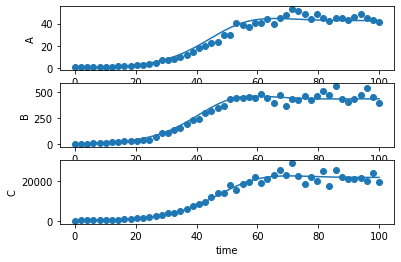

In [28]:
fig, ax = plt.subplots(3)
cmplist = ['A', 'B', 'C']
for (i, c) in enumerate(cmplist):
    ax[i].scatter(r1.results.Cm.index, r1.results.Cm[c])
    ax[i].plot(r1.results.Z.index, r1.results.Z[c])
    ax[i].set_xlabel('time')
    ax[i].set_ylabel(c)

In [29]:
# since kipet outputs reduced hessian which equals covariance if right sigma values are specified. 
# since we just specified sigma=1, we need to adjust the covariance matrix output from KIPET to get the 
# estimated covariance matrix
mse = r1.results.objective / (C_data.shape[0]*3 - 6)
cov_est = 2 * mse * r1.results.parameter_covariance
cov_est

array([[ 0.00095257, -0.00596894, -0.00062205, -0.0056943 , -0.00087417,
         0.00145695],
       [-0.00596894,  0.06057738,  0.00780377,  0.06318226,  0.00802034,
        -0.01653487],
       [-0.00062205,  0.00780377,  0.00663074,  0.00854614,  0.00654284,
        -0.00264215],
       [-0.0056943 ,  0.06318226,  0.00854614,  0.066746  ,  0.00834248,
        -0.01759593],
       [-0.00087417,  0.00802034,  0.00654284,  0.00834248,  0.00689034,
        -0.00247273],
       [ 0.00145695, -0.01653487, -0.00264215, -0.01759593, -0.00247273,
         0.00475417]])

In [30]:
eigval, eigvec = sla.eig(cov_est)
eigval, eigvec

(array([1.34379352e-01+0.j, 1.10013898e-02+0.j, 9.72852091e-04+0.j,
        1.49361433e-04+0.j, 2.31052460e-06+0.j, 4.59273527e-05+0.j]),
 array([[-0.06307685,  0.01053725, -0.62465893,  0.48979116, -0.59699895,
          0.09699673],
        [ 0.66950834, -0.10781138,  0.46687817,  0.00603945, -0.51880256,
          0.2301467 ],
        [ 0.09706093,  0.69163172, -0.24908549, -0.45284075, -0.02863722,
          0.49426341],
        [ 0.70324047, -0.0945106 , -0.43647601,  0.17900727,  0.52246646,
         -0.03153523],
        [ 0.09714642,  0.70755516,  0.2723155 ,  0.47450515,  0.03589106,
         -0.43511979],
        [-0.18540357, -0.01856535,  0.25517715,  0.54571481,  0.31520897,
          0.70922783]]))

In [31]:
eigvec[:,4]

array([-0.59699895, -0.51880256, -0.02863722,  0.52246646,  0.03589106,
        0.31520897])

In [32]:
dof = C_data.shape[0]*3 - 6
conf_delta = t.ppf(0.975, dof) * np.sqrt(np.diag(cov_est))
conf_delta, conf_delta / np.abs(np.array(list(r1.results.P.values())))

(array([0.06100441, 0.486484  , 0.16095121, 0.51065304, 0.16407167,
        0.13628585]),
 array([0.18882399, 0.29022898, 0.07402156, 0.76021453, 0.30567406,
        0.0269075 ]))